1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

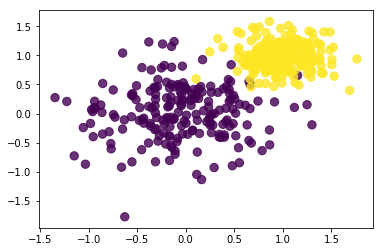

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

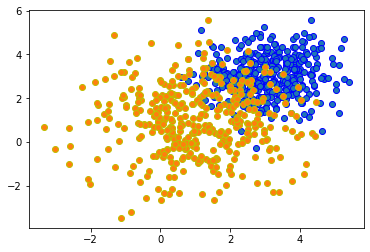

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mu_1, sigma_1 = 3, 0.9 # mean and standard deviation dataset 1
mu_2, sigma_2 = 1, 1.5 # mean and standard deviation dataset 2

x_1 = np.random.normal(mu_1, sigma_1, 400)
y_1 = np.random.normal(mu_1, sigma_1, 400)

x_2 = np.random.normal(mu_2, sigma_2, 400)
y_2 = np.random.normal(mu_2, sigma_2, 400) 

fig, ax = plt.subplots() # create the figure and the axes

ax.scatter(x=x_1, y=y_1, marker='o', edgecolor='b')
ax.scatter(x=x_2, y=y_2, marker='o', edgecolor='y')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10490 rows x 2 columns]


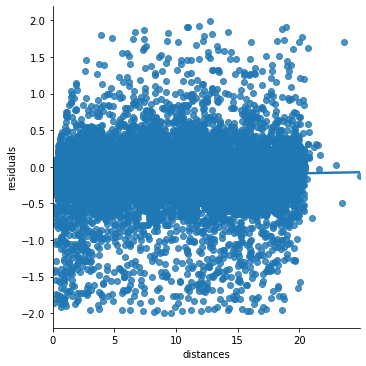

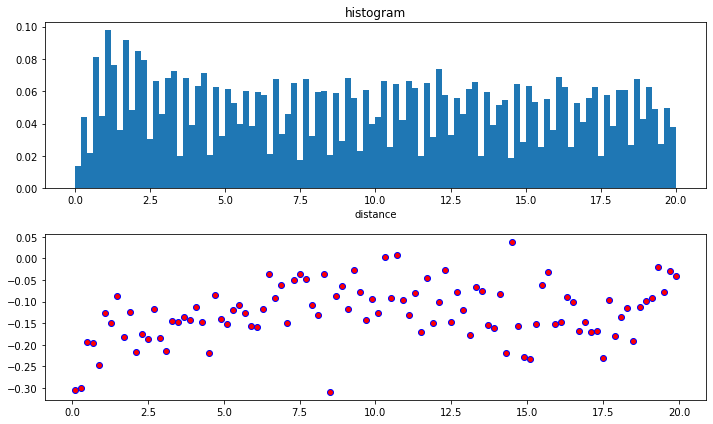

In [3]:
import pandas as pd
import math
import pickle
import numpy as np
import seaborn as sns

# Read pickle
file = open('residuals_261.pkl', 'rb')
df = pickle.load(file)
file.close()

list = df.tolist()

#separate the data
residuals = []
distances = []

for i in range(11131):
    residuals.append(list['residuals'][i])
    distances.append(list['distances'][i])

df = pd.DataFrame()
df['residuals'] = residuals
df['distances'] = distances

#create filtered df
smaller =  abs(df['residuals'])<=2

filtered_df = df[smaller]
print(filtered_df)

#Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
sns.lmplot(data=filtered_df, x="distances", y="residuals" )


#
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(10, 6)) # create the figure and the axes

h, bins, _ = ax0.hist(distances, bins=100, range=(0,20), density=True, cumulative=False) # create and plot the histogram

ax0.set_title('histogram')
ax0.set_xlabel('distance')
fig.tight_layout()

#x, the array of bin centers of the profile histogram of the "distance" variable
x = 0.5*(bins[1:] + bins[:-1])

y = []
err_y = []

len_bins = bins.shape[0]
for i in range(len_bins-1):
    
    cond1 = filtered_df["distances"] >= bins[i] 
    cond2 = filtered_df["distances"] <= bins[i+1]
    temp2 = filtered_df[cond1 & cond2]
    
    #standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
    err_y.append(temp2['residuals'].std()) 
    
    # the mean values of the "residuals", estimated in slices (bins) of "distance"
    n = temp2.shape[0]
    value = sum(temp2['residuals'])
    y.append(value/n)
    

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b') # create the scatter plot in ax1

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


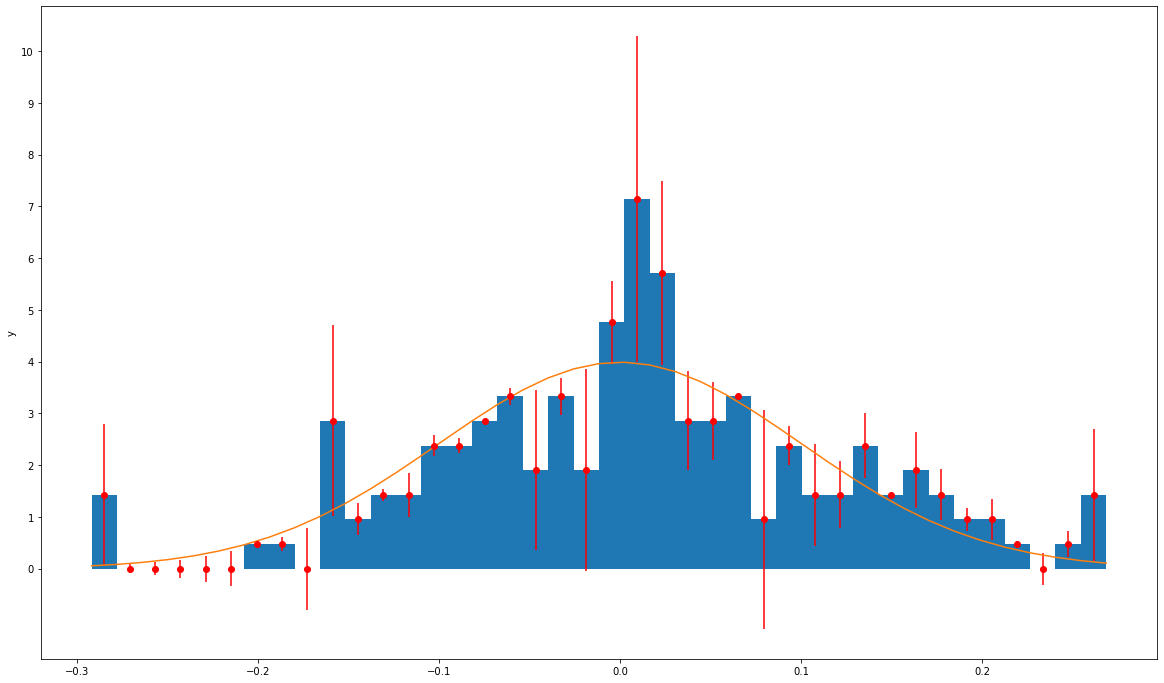

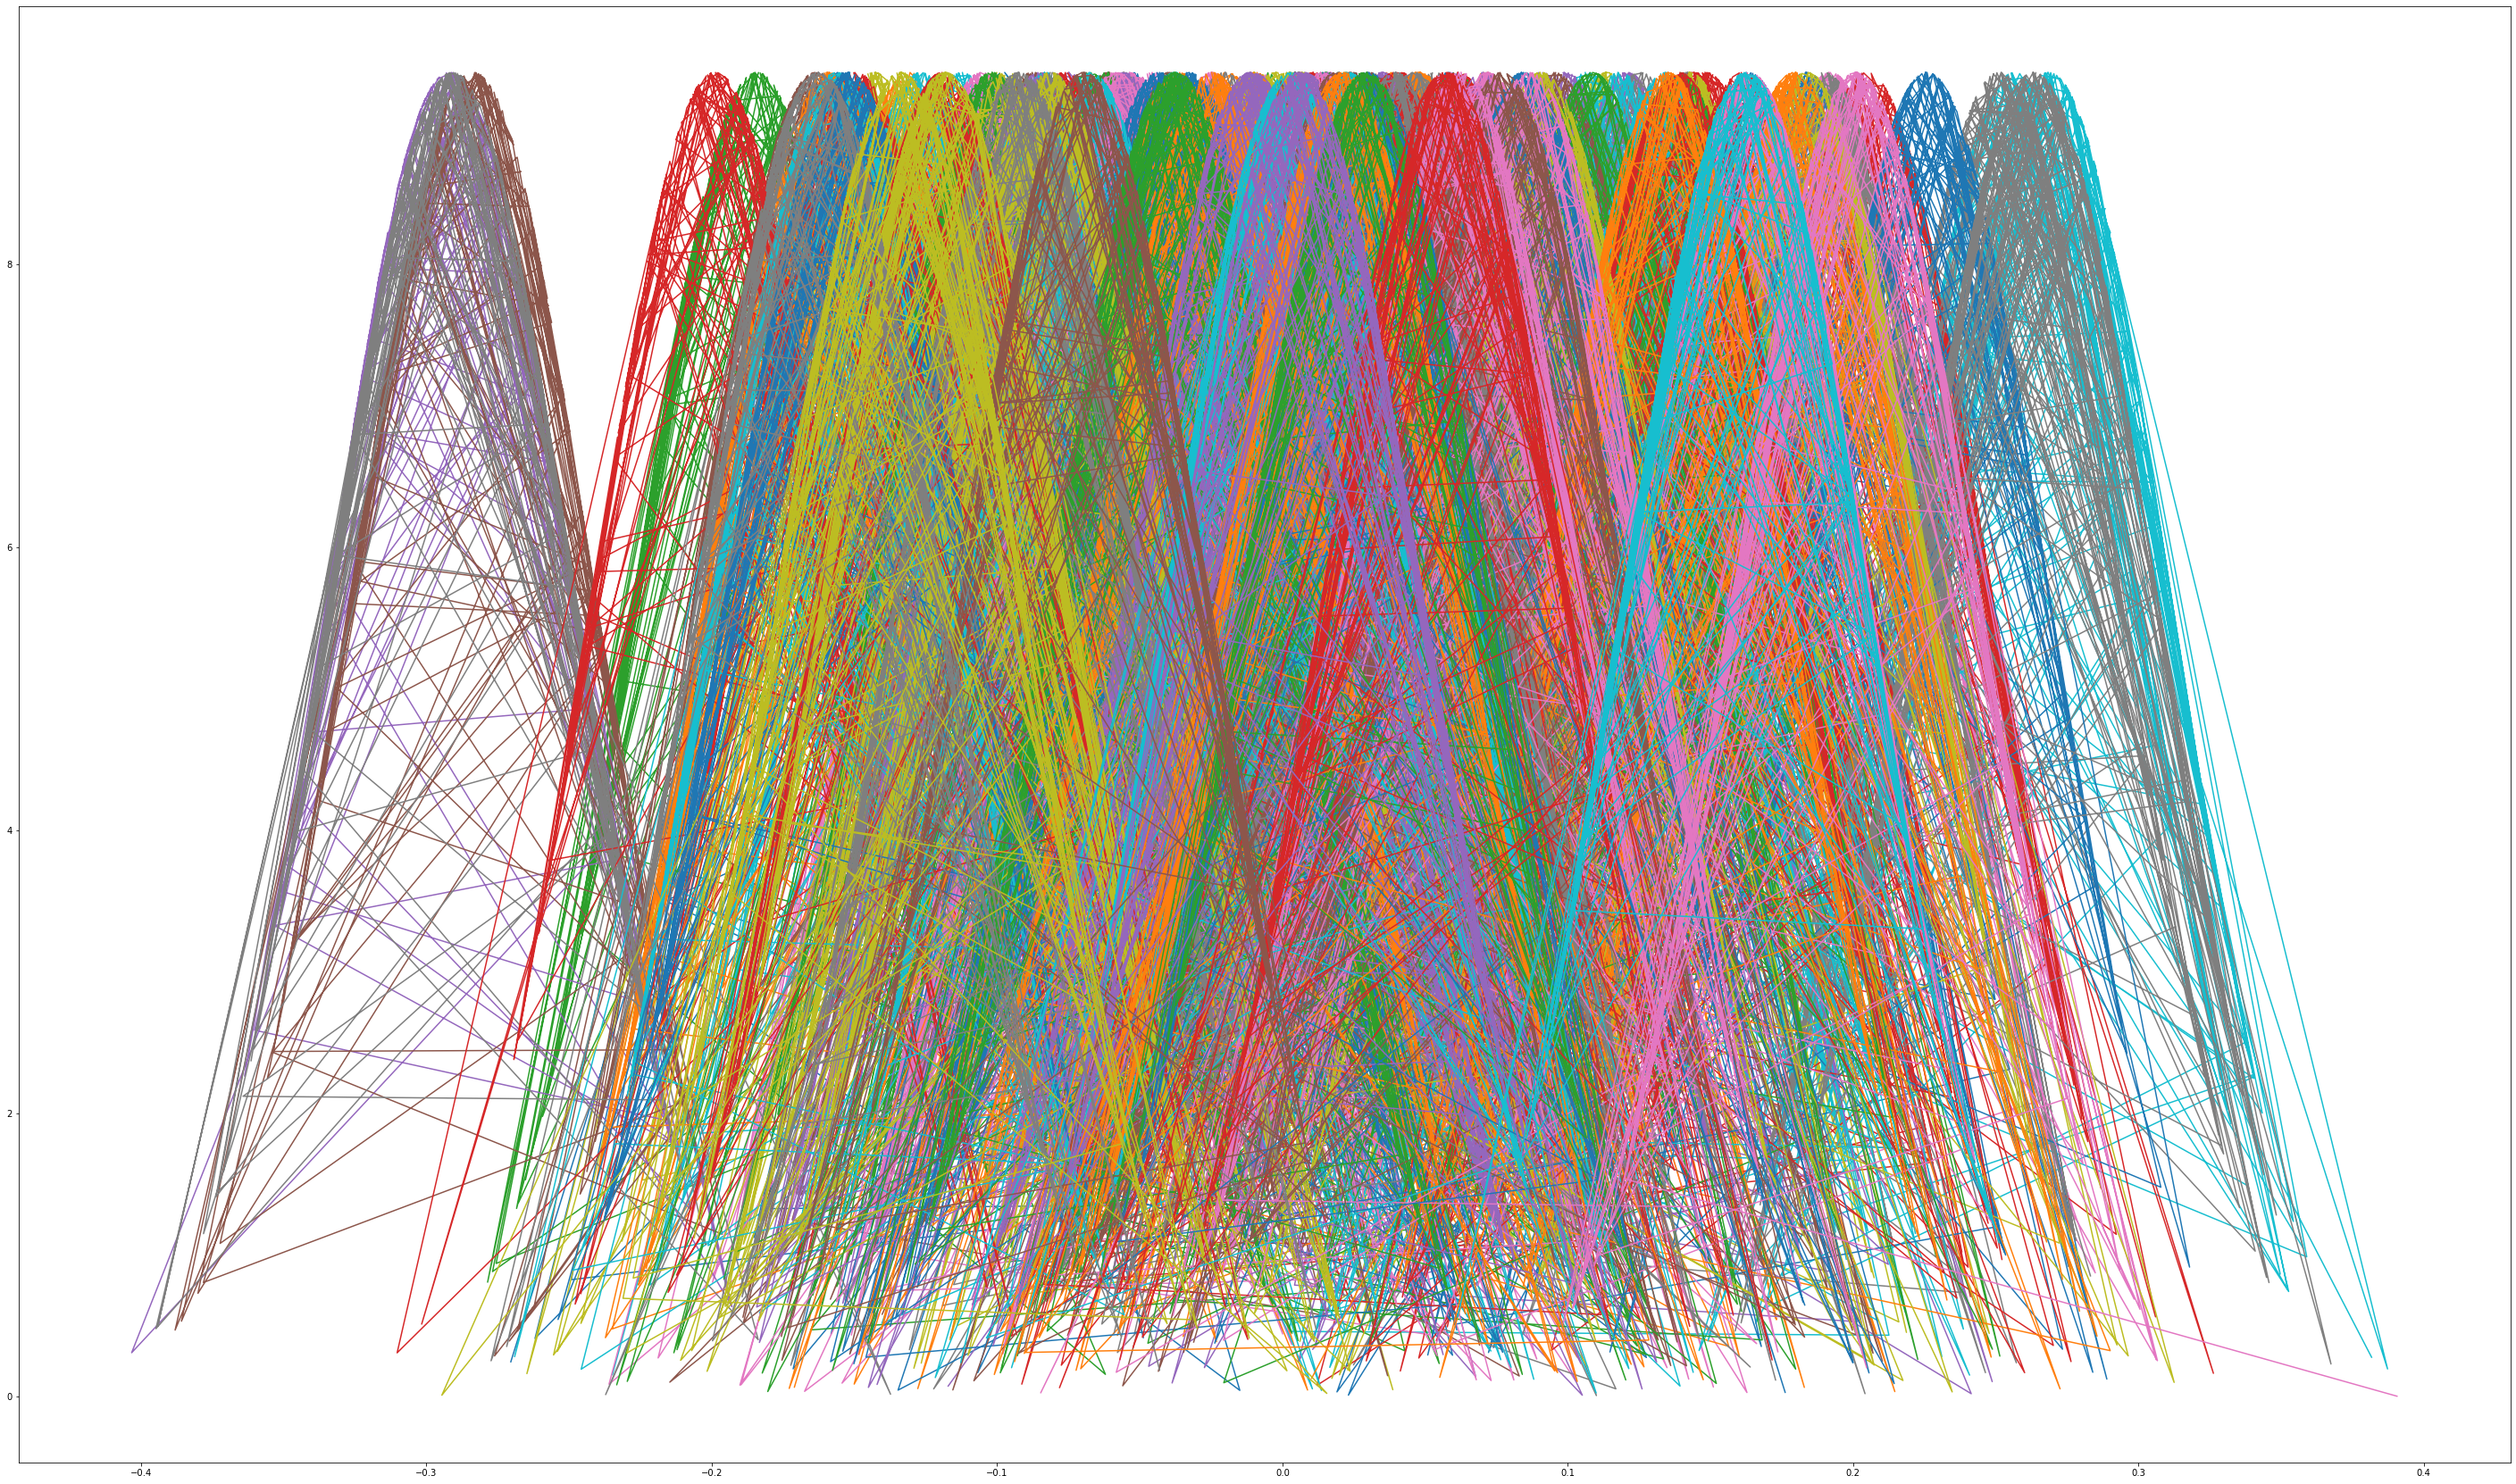

sum of the integral of the original histogram: 69.9528243854437
sum of all the gaussian functions 66.6948075781166


In [4]:
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
import math

mu, sigma = 0, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 150)

fig, ax = plt.subplots(figsize=(20, 12)) # create the figure and the axes
count, bins, ignored = plt.hist(x, 40, density=True)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

ax.set_ylabel('y')

major_ticks = np.arange(0, 15, 1)
ax.set_yticks(major_ticks)

bin_centres = (bins[:-1] + bins[1:])/2.
new_array = np.delete(best_fit_line, 40) 
new_bins = np.delete(bins, 40) 
err = count - new_array
plt.errorbar(bin_centres, count, yerr=err,color='r', fmt='o')



fig, ax = plt.subplots(figsize=(50, 30)) # create the figure and the axes
sdv = 1.06*x.std()*x.size**(-1/5)
s = 0

for i in x: 
    x_axis = np.random.normal(i, sdv, 150)
    ax.plot(x_axis, norm.pdf(x_axis,i,sdv))
    s = sum(norm.pdf(x_axis,i,sdv))/15
plt.show()   

print("sum of the integral of the original histogram:",scipy.integrate.trapz(count))#67
print("sum of all the gaussian functions",s)    